## Отчёт по курсовой работе 
## Тема: "Разработка диалоговой системы с применением обучения с подкреплением"

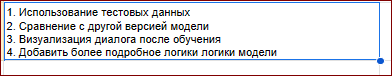

Выполнила: 
 >   студентка 2 курса группы ПМ21-1 \
    Факультета информационных технологий \
    и анализа больших данных\
    Зиновьева Ксения Александровна,

Проверил: 
  >   ассистент Департамента анализа\
     данных и машинного обучения\
      Блохин Никита Владимирович


Импортируем библиотеки, необходимые для демонстрации данных, модели и частей кода:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Введение и цель работы

Конечной целью данной работы является создание и обучение диалогового бота, который способен путем диалога с пользователем (или его симулятором) достичь определенной цели. При построение модели используется нейронная сеть с одним скрытым слоем, а также алгоритм DQN

Мною был выбран датасет, включающий в себя **208** названий различных моделей фототехники, а также признаки (**12** технических характеристик моделей фотокамер)

Решаемая задача модели: подбор наилучшего совпадения, исходя из запросов и целей пользователя (нескольких характеристик, указанных в запросе пользователя)

Цель работы: обучение модели и проверка на тестовых данных, рассмотрение модели с различными параметрами (размер скрытого слоя, количество эпизодов) с целью выбора наилучшей модели.

# 2. Демонстрация данных

Ниже представлен полный датасет, на основе которого были создана база данных для обучения агента. Позже он будет разделен на обучающую и тестовую выборки.

In [3]:
data=pd.read_csv('C:/Users/Ксения/КУРСОВАЯ/data cameras/cameras_data_csv.csv')
data

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
2,Canon PowerShot A100,2002,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0
3,Canon PowerShot A310,2004,2048.0,1600.0,3.0,33.0,33.0,0.0,5.0,0.0,205.0,110.0,139.0
4,Canon PowerShot A430,2006,2272.0,1600.0,4.0,39.0,156.0,47.0,1.0,16.0,210.0,103.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Sony Mavica FD-88,1999,1280.0,1024.0,1.0,34.0,270.0,4.0,4.0,1.0,600.0,142.0,1399.0
204,Toshiba PDR-3310,2002,2048.0,1024.0,3.0,35.0,105.0,55.0,12.0,8.0,205.0,91.0,177.0
205,Toshiba PDR-M11,2001,1280.0,640.0,1.0,52.0,52.0,90.0,0.0,8.0,240.0,116.0,62.0
206,Toshiba PDR-M5,1999,1600.0,800.0,1.0,40.0,120.0,90.0,25.0,8.0,350.0,130.0,62.0


In [4]:
data.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,207.000000,207.000000,207.000000,208.000000
mean,2003.692308,2509.043269,1839.562500,4.740385,32.307692,121.177885,43.668269,8.230769,18.995169,331.072464,107.565217,437.918269
std,2.718969,760.577833,809.504582,2.812997,10.823643,92.022010,25.017686,9.469739,35.011163,261.231140,22.016418,629.720794
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
25%,2002.000000,2048.000000,1280.000000,3.000000,34.000000,100.000000,30.000000,2.000000,8.000000,184.500000,93.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.500000,35.000000,108.000000,50.000000,6.000000,16.000000,230.000000,104.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,116.000000,60.000000,10.000000,22.500000,395.000000,119.500000,399.000000
max,2007.000000,4536.000000,3456.000000,13.000000,52.000000,504.000000,90.000000,85.000000,450.000000,1650.000000,194.000000,4999.000000


Рассмотрим типы используемых данных:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    208 non-null    object 
 1   Release date             208 non-null    int64  
 2   Max resolution           208 non-null    float64
 3   Low resolution           208 non-null    float64
 4   Effective pixels         208 non-null    float64
 5   Zoom wide (W)            208 non-null    float64
 6   Zoom tele (T)            208 non-null    float64
 7   Normal focus range       208 non-null    float64
 8   Macro focus range        208 non-null    float64
 9   Storage included         207 non-null    float64
 10  Weight (inc. batteries)  207 non-null    float64
 11  Dimensions               207 non-null    float64
 12  Price                    208 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 21.2+ KB


Проверим данные на наличие пустых значений:

In [6]:
data.isna().sum()


Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           1
Weight (inc. batteries)    1
Dimensions                 1
Price                      0
dtype: int64

Рассмотрим несколько countplot (количество каждого типа определенного параметра): 

Low resolution

<AxesSubplot:xlabel='Low resolution', ylabel='count'>

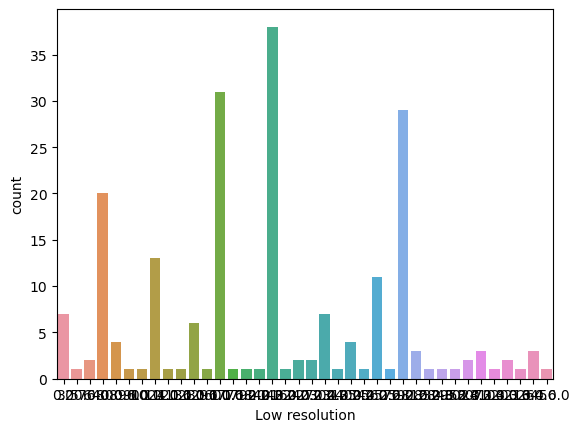

In [15]:
sns.countplot(x='Low resolution', data=data)

Max resolution

<AxesSubplot:xlabel='Max resolution', ylabel='count'>

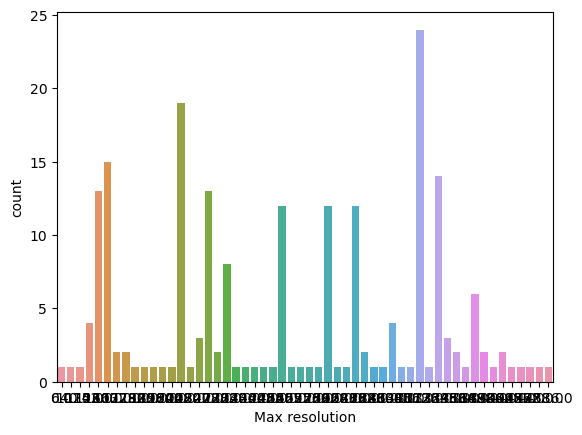

In [11]:
sns.countplot(x='Max resolution', data=data)

In [7]:
#sns.pairplot(data)

Price

<AxesSubplot:xlabel='Price', ylabel='count'>

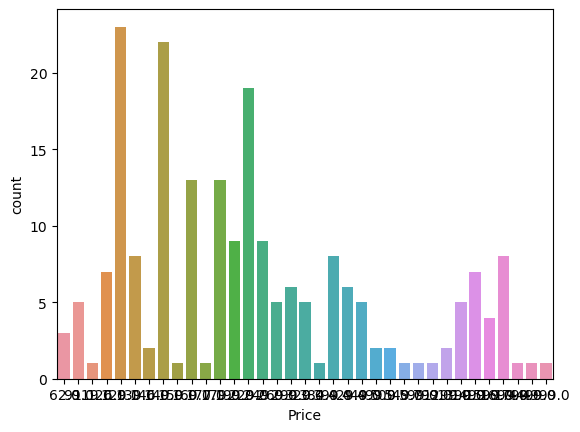

In [12]:
sns.countplot(x='Price', data=data)

Zoom Wide (W)

<AxesSubplot:xlabel='Zoom wide (W)', ylabel='count'>

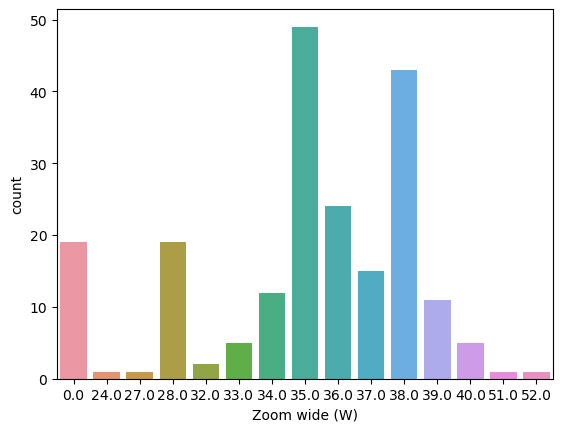

In [16]:
sns.countplot(x='Zoom wide (W)', data=data)

Корреляция признаков датасета:

<AxesSubplot:>

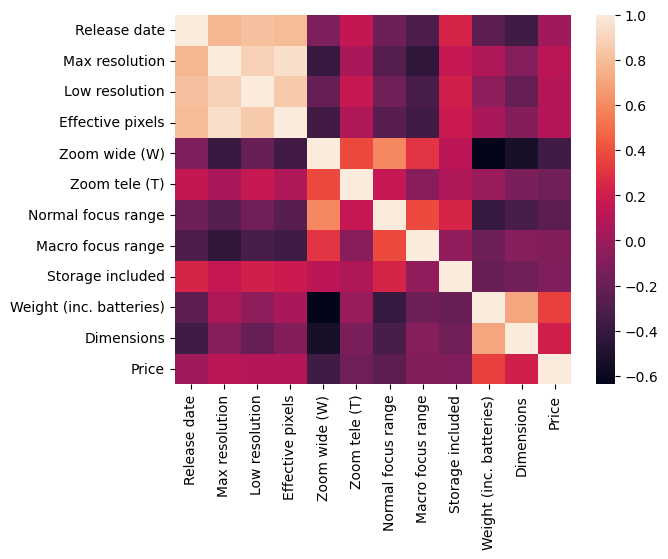

In [17]:
sns.heatmap(data.corr())

Представленные факторы являются техническими характеристиками фототехники (описывают технические возможности: расстояние зума, выдержка, расстояние фокусировки, цена). Для данной работы все имеющиеся данные будут использованы лишь как наполнение базы данных, мультиколлинеарность, пустые значения, выбросы не будут оказывать влияние на обучение модели.

# 3.  Предобработка данных

Данные в датасете являются числовыми в физическом смысле, однако, для последующей обработки бот должен получать на вход строковый тип данных, поэтому все данные преобразованы в строки. Для дальнейшей работы данный датасет делится на несколько файлов формата Pickle, а именно:
 - cameras_db.pkl - в данном файле данные собраны в формает словаря, где ключом является название модели техники (индекс модели) (то, что желает узнать пользователь, а в значениях хранятся словари формата {"название характеристики техники": "числовое значение в строковом типе данных"})
 - cameras_dict.pkl - здесь все данные собраны в словарь, где ключ это техническая характеристика, а значение это список со всевозможными вариантами данной характеристики
 - camera_user_goals.pkl - словарь, содержащий словари возможных целей - запросов пользователей, сгенерированный из оригинального датасета.
Автоматического деления на тестовую и тренировочную выборки нет. Это сделано в ручную для того, чтобы после тренировки протестировать модель на тестовом наборе данных для замера эффективности (succes_rate, avg reward). Для тестовго набора в файле с константами меняется ссылка на базу данных (с тестовым набором)

**Код генерации файлов с данными, из изначального датасета:**

In [ ]:
data=pd.read_csv('camera_dataset.csv')
data=data[0:-1:4]
keys=[]
for i in range(0, len(data)):
    keys.append(i)
data=data.astype('str')
values=data.drop('Model', axis=1)
d=values.to_dict('records')
data_d={}
for k, v in zip(keys, d):
    data_d[k]=v
with open('cameras_db.pkl', 'wb') as f:
    pickle.dump(data_d, f)
data=pd.read_csv('camera_dataset.csv')
data=data[0:-1:4]
data=data.drop('Model', axis=1)
data=data.astype('str')
with open('cameras_dict.pkl', 'wb') as f:
    pickle.dump(dict_cam, f)


В следующей ячейке приведён код для генерациии файла camera_user_goals.pkl, в котором содержатся возможные цели пользователя.\
Структура цели пользователя:\
{слоты с запросом (могут быть пустыми, тогда бот просто запомминает их), слот diact:'request', слоты с информацией}\
В слотах с запросами содержатся значения, на которые пользователь ждет ответ, в слотах с информацией содержится информация, которую нужно передать собеседнику.\
Пример:\
{'request_slots': {'Release date': 'UNK'}, 'diaact': 'request', 'inform_slots': {'Low resolution': "'2048.0'", 'Effective pixels': "'4.0'", 'Zoom wide (W)': "'37.0'"}}

In [ ]:
import random

# Списки возможных значений для каждого слота
release_dates = list(data['Release date'])
max_resolutions = list(data['Max resolution'])
low_resolutions = list(data['Low resolution'])
effective_pixels = list(data['Effective pixels'])
storage_included = list(data['Storage included'])
zoom_tele = list(data['Zoom tele (T)'])
dimensions = list(data['Dimensions'])
prices = list(data['Price'])

# Список слотов, для которых нужно сделать запрос значения
request_slots = ['Release date', 'Max resolution', 'Low resolution', 'Effective pixels', 'Storage included', 'Zoom tele (T)', 'Dimensions', 'Price']

# Создаем пустой список для запросов
requests = []

# Создаем случайные запросы
for _ in range(3):
    request = {'diaact': 'request', 'inform_slots': {}, 'request_slots': {}}
    for slot in request_slots:
        if random.random() < 0.5:  # Рандомно решаем, нужно ли сделать запрос для данного слота
            request['request_slots'][slot] = 'UNK'
    requests.append(request)

# Создаем случайные информационные сообщения
for _ in range(3):
    request = {'diaact': 'inform', 'inform_slots': {}, 'request_slots': {}}
    if random.random() < 0.5:
        request['inform_slots']['Release date'] = random.choice(release_dates)
    if random.random() < 0.5:
        request['inform_slots']['Max resolution'] = random.choice(max_resolutions)
    if random.random() < 0.5:
        request['inform_slots']['Low resolution'] = random.choice(low_resolutions)
    if random.random() < 0.5:
        request['inform_slots']['Effective pixels'] = random.choice(effective_pixels)
    if random.random() < 0.5:
        request['inform_slots']['Storage included'] = random.choice(storage_included)
    if random.random() < 0.5:
        request['inform_slots']['Zoom tele (T)'] = random.choice(zoom_tele)
    requests.append(request)

# Создаем случайные отказы
for _ in range(1):
    request = {'diaact': 'reject', 'inform_slots': {}, 'request_slots': {}}
    requests.append(request)

# Создаем случайные запросы для слотов 'Dimensions' и 'Price'
for _ in range(1):
    request = {'diaact': 'request', 'inform_slots': {}, 'request_slots': {}}
    if random.random() < 0.5:
        request['request_slots']['Dimensions'] = 'UNK'
    if random.random() < 0.5:
        request['request_slots']['Price'] = 'UNK'
    requests.append(request)

# Добавляем сообщение о завершении диалога
done = {'diaact': 'done', 'inform_slots': {}, 'request_slots': {}}
requests.append(done)
r=[]
# Печатаем сгенерированные запросы
for request in requests:
    r.append(request)

In [ ]:
with open('camera_user_goals.pkl', 'wb') as f:
        pickle.dump(r, f)

cameras_db:
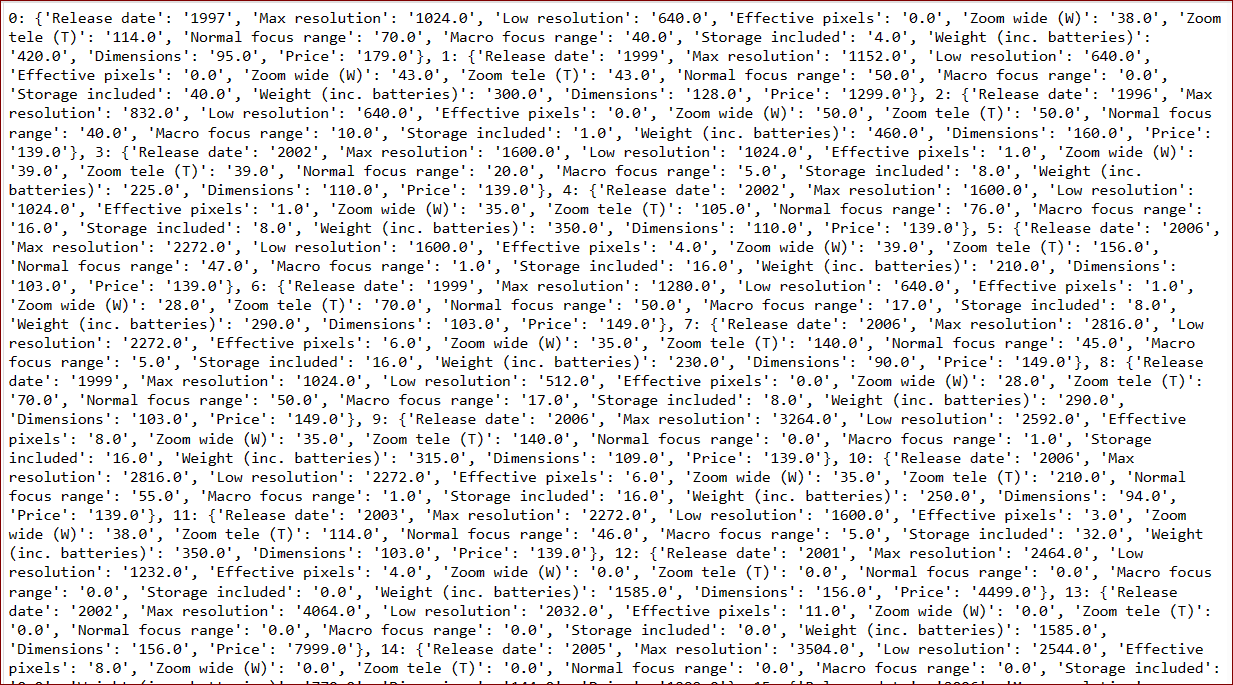

cameras_dict:
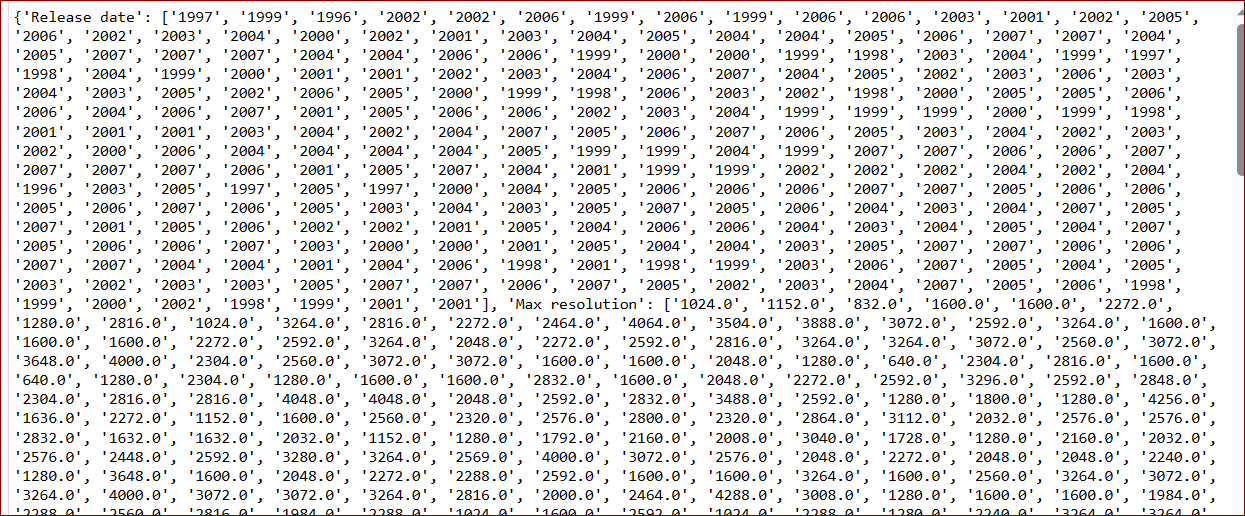

camera_user_goals:
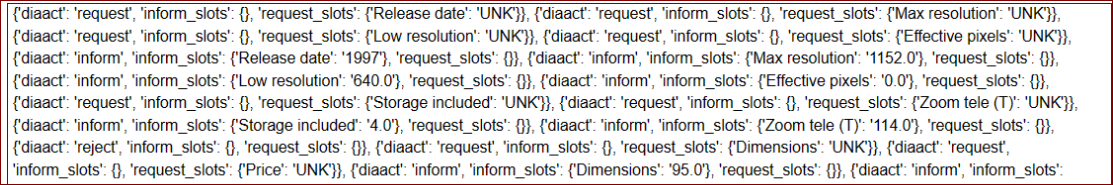

Графики распределения величин параметров фототехники (выбросы и распределение не имеют весомого значения)

<AxesSubplot:xlabel='Max resolution'>

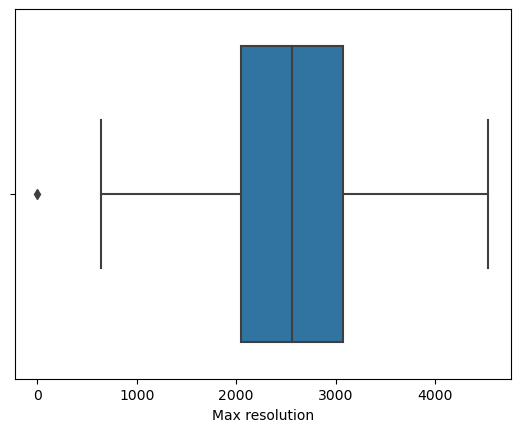

In [18]:
sns.boxplot(data['Max resolution'])

<AxesSubplot:xlabel='Low resolution'>

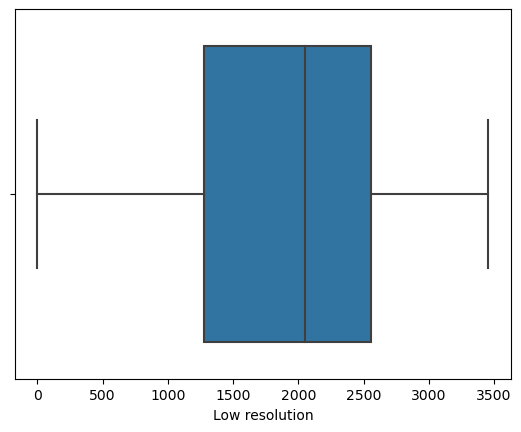

In [19]:
sns.boxplot(data['Low resolution'])

<AxesSubplot:xlabel='Release date'>

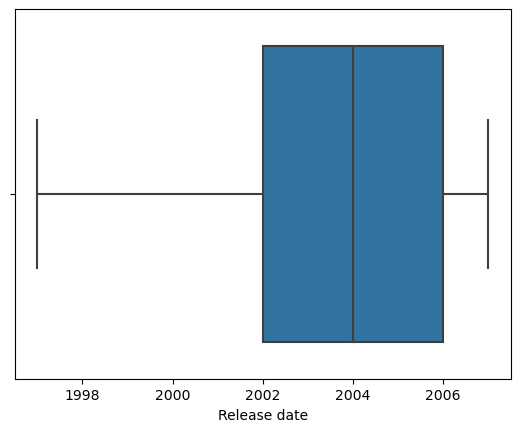

In [20]:
sns.boxplot(data['Release date'])

<AxesSubplot:xlabel='Effective pixels'>

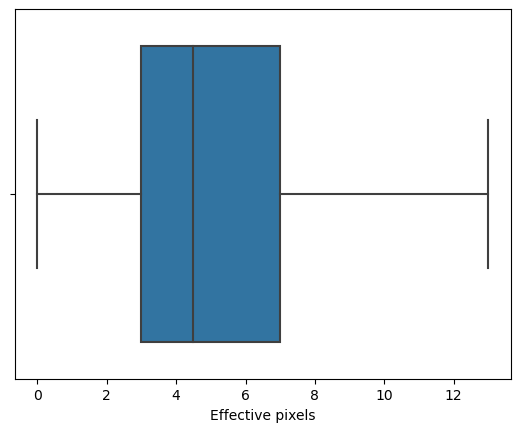

In [21]:
sns.boxplot(data['Effective pixels'])

<AxesSubplot:xlabel='Zoom wide (W)'>

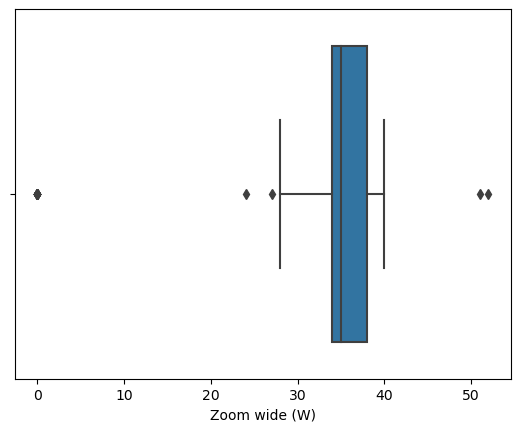

In [22]:
sns.boxplot(data['Zoom wide (W)'])

<AxesSubplot:xlabel='Zoom tele (T)'>

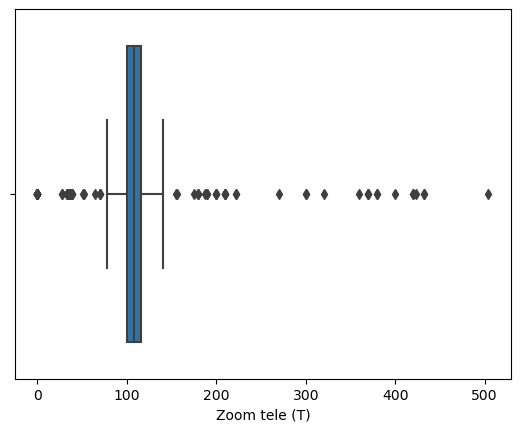

In [23]:
sns.boxplot(data['Zoom tele (T)'])

<AxesSubplot:xlabel='Normal focus range'>

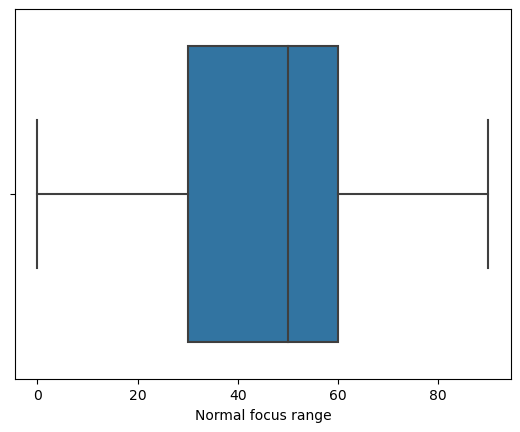

In [24]:
sns.boxplot(data['Normal focus range'])

<AxesSubplot:xlabel='Macro focus range'>

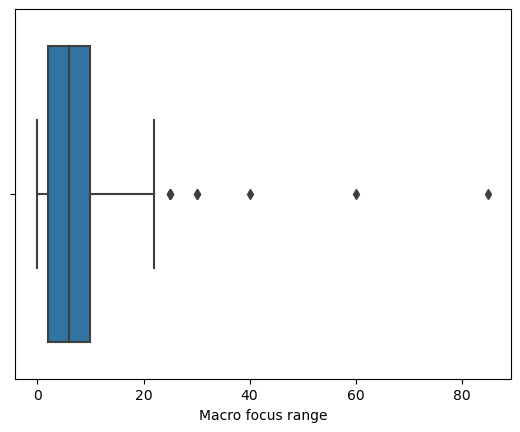

In [25]:
sns.boxplot(data['Macro focus range'])

<AxesSubplot:xlabel='Storage included'>

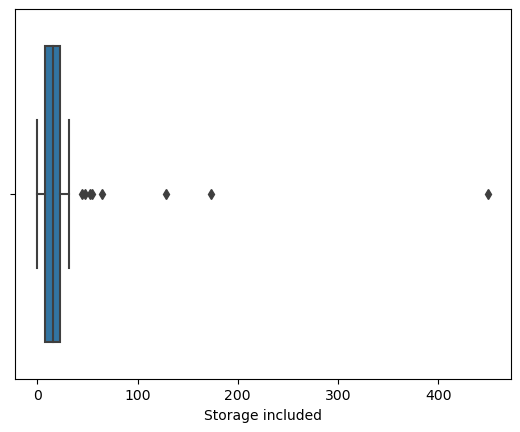

In [26]:
sns.boxplot(data['Storage included'])

<AxesSubplot:xlabel='Weight (inc. batteries)'>

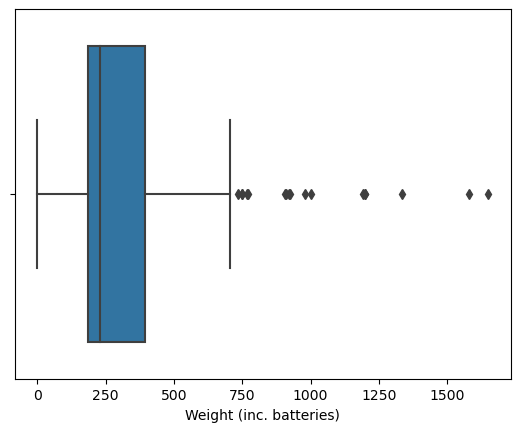

In [27]:
sns.boxplot(data['Weight (inc. batteries)'])

<AxesSubplot:xlabel='Dimensions'>

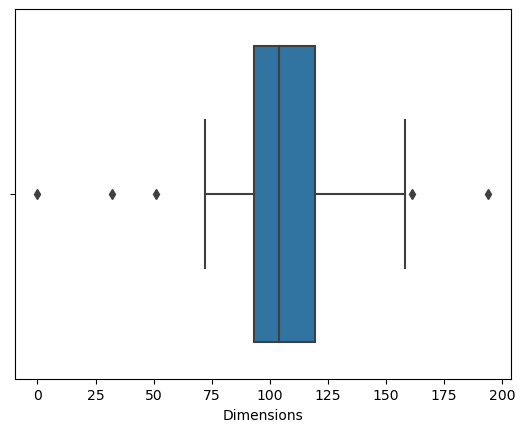

In [28]:
sns.boxplot(data['Dimensions'])

<AxesSubplot:xlabel='Price'>

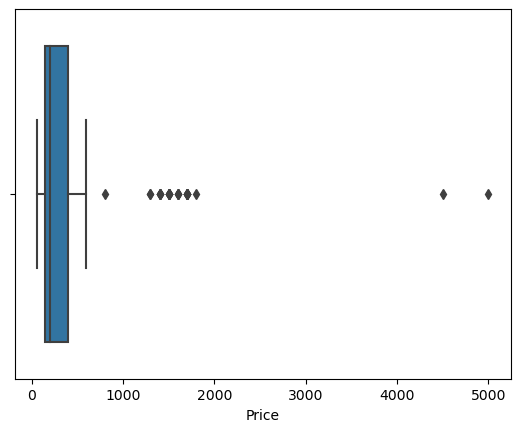

In [29]:
sns.boxplot(data['Price'])

## Тестовый набор данных генерируется аналогично тренировочному.

# 6. Описание модели

Обучение чат-бота происходит при помощи DQN (Deep Q Network), то есть обучения с подкреплением на основе (однослойной) нейронной сети.


###  Как работает DQN?

Данный метод основан на анализе моделью текущей ситуации (состояния), основываясь на накопленном опыте для выбора следующего действия, конечной целью данного цикла является получение вознаграждения.\
Агент выбирает действия, основываясь на политике (правилах).\
Q - условная функция, зависящая от текущего состояния агента и действия, которое предпринимает агент.\
Нейронная сеть определяет все возможные действия и оценивает потенциальное значение Q каждого из возможных действий.

### Алгоритм Q-Learning:

Агент находится в состоянии s и должен выбрать действие a, при котором он получает награду r и приходит в новое состояние s'. При этом агент руководствуется политикой. Формульно это выглядит так:

$s → (a) →  р,s′$\
Пусть функция Q(s, a) будет задана так, чтобы для данного состояния s и действия a она возвращала оценку общего вознаграждения, которое можно получить, начиная с текущего состояния, предпринимая действие, следуя некоторой политике. Безусловно, существуют политики, которые являются оптимальными, а это означает, что они всегда выбирают действие, которое является лучшим в контексте. Назовем функцию Q для этих оптимальных политик Q*.\
Если бы функция, которая вычисляет наилучший алгоритм дейтсвий с максимальной наградой была бы известна, то задача была бы проще (следовало бы просто максимизировать функцию на каждом шаге), однако цель данного алгоритма и заключается в поиске Q*\
Значит, каждый следующий шаг, мы будем совершать подобное действие:\
$Q^*(С,А)=r_0+γr_1+γ^2r_2+γ^3r_3+...$\
$\gamma$ - коэффициент, который < 1, гарантирует конечность этой формулы.
Теперь запишем эту формулу в рекурсивном виде:\
$Q^∗(С,А)=r_0+γ(r_1+γr_2+γ^2r_3+...)=r_0+γ.max_a Q^∗(s′,a)$\
$r_0+γ.max_a Q^∗(s′,a)$ - данная формула является **уравнением  Беллмана**.

Таким образом суть Q-Learning заключется в формуле $Q(s,a)=r+γ.max_aQ(s′,a)$, которая сойдется к наилучшему $Q^*$

В данной задаче состоянием является массив numpy с действительными числами, соотвественно пространство состояни весьма велико, для этого то и потребуется нейронная сеть.\
Нейронная сеть принимает на вход массив состояний и возвращает все возможные оценки Q для возможных действий.



Модель реализуется в классе DQNAgent при помощи Pytorch:\
В констукторе класса инициализируются основные константы, которые будут использоваться для построения модели и обучения агента.
В данном классе происходит поиск наилучших параметров методом градиентного спуска.


In [ ]:

class DQNAgent:
  

    def __init__(self, state_size, constants):
        """
       Конструктор класса агента, сохранящий главные константы 
        """
        self.C = constants['agent']
        self.memory = []
        self.memory_index = 0
        self.max_memory_size = self.C['max_mem_size']
        self.eps = self.C['epsilon_init']
        self.vanilla = self.C['vanilla']
        self.lr = self.C['learning_rate']
        self.gamma = self.C['gamma']
        self.batch_size = self.C['batch_size']
        self.hidden_size = self.C['dqn_hidden_size']
        
        #self.load_weights_file_path = self.C['load_weights_file_path']
        #self.save_weights_file_path = self.C['save_weights_file_path']
        self.device = device
        if self.max_memory_size < self.batch_size:
            raise ValueError('Max memory size must be at least as great as batch size!')

        self.state_size = state_size
        self.possible_actions = agent_actions
        self.num_actions = len(self.possible_actions)
        self.rule_request_set = rule_requests
        self.beh_model = self._build_model()
        self.tar_model = self._build_model()
        self.optim = Adam(self.beh_model.parameters(), lr=self.lr)
        self.criterion=MSELoss()

        self._load_weights()

        self.reset()


    
    def _build_model(self):
        """Построение однослойной модели"""

        model = Sequential(
            Linear(self.state_size, self.hidden_size, dtype=float),
            ReLU(),
            Linear(self.hidden_size, self.num_actions, dtype=float)
        )
        
        return model.to(self.device)
    
    
    def reset(self):

        self.rule_current_slot_index = 0
        self.rule_phase = 'not done'

    def get_action(self, state, use_rule=False):

        if self.eps > random.random():
            index = random.randint(0, self.num_actions - 1)
            action = self._map_index_to_action(index)
            return index, action
        else:
            if use_rule:
                return self._rule_action()
            else:
                return self._dqn_action(state)

    def _rule_action(self):

        if self.rule_current_slot_index < len(self.rule_request_set):
            slot = self.rule_request_set[self.rule_current_slot_index]
            self.rule_current_slot_index += 1
            rule_response = {'intent': 'request', 'inform_slots': {}, 'request_slots': {slot: 'UNK'}}
        elif self.rule_phase == 'not done':
            rule_response = {'intent': 'match_found', 'inform_slots': {}, 'request_slots': {}}
            self.rule_phase = 'done'
        elif self.rule_phase == 'done':
            rule_response = {'intent': 'done', 'inform_slots': {}, 'request_slots': {}}
        else:
            raise Exception('Should not have reached this clause')

        index = self._map_action_to_index(rule_response)
        return index, rule_response

    def _map_action_to_index(self, response):

        for (i, action) in enumerate(self.possible_actions):
            if response == action:
                return i
        raise ValueError('Response: {} not found in possible actions'.format(response))

    def _dqn_action(self, state):

        index = np.argmax(self._dqn_predict_one(state))
        action = self._map_index_to_action(index)
        return index, action

    def _map_index_to_action(self, index):


        for (i, action) in enumerate(self.possible_actions):
            if index == i:
                return copy.deepcopy(action)
        raise ValueError('Index: {} not in range of possible actions'.format(index))

    def _dqn_predict_one(self, state, target=False):

        return self._dqn_predict(state.reshape(1, self.state_size), target=target).flatten()


    
    
    
    def _dqn_predict(self, states, target=False):
        """
 Функция, возвращающая предсказываемую Q-функцию, основываясь на состоянии
        """

        model = self.tar_model if target else self.beh_model
        return model(torch.tensor(states, dtype=float, device=self.device)).detach().cpu().numpy()


    def add_experience(self, state, action, reward, next_state, done):

        if len(self.memory) < self.max_memory_size:
            self.memory.append(None)
        self.memory[self.memory_index] = (state, action, reward, next_state, done)
        self.memory_index = (self.memory_index + 1) % self.max_memory_size

    def empty_memory(self):

        self.memory = []
        self.memory_index = 0

    def is_memory_full(self):

        return len(self.memory) == self.max_memory_size

    def train(self):
        num_batches = len(self.memory) // self.batch_size
        for b in range(num_batches):
            batch = random.sample(self.memory, self.batch_size)

            states = np.array([sample[0] for sample in batch])
            next_states = np.array([sample[3] for sample in batch])

            assert states.shape == (self.batch_size, self.state_size), 'States Shape: {}'.format(states.shape)
            assert next_states.shape == states.shape

            beh_state_preds = self._dqn_predict(states)  
            if not self.vanilla:
                beh_next_states_preds = self._dqn_predict(next_states)  
            tar_next_state_preds = self._dqn_predict(next_states, target=True)  

            inputs = np.zeros((self.batch_size, self.state_size))
            targets = np.zeros((self.batch_size, self.num_actions))

            for i, (s, a, r, s_, d) in enumerate(batch):
                t = beh_state_preds[i]
                if not self.vanilla:
                    t[a] = r + self.gamma * tar_next_state_preds[i][np.argmax(beh_next_states_preds[i])] * (not d)
                else:
                    t[a] = r + self.gamma * np.amax(tar_next_state_preds[i]) * (not d)
                inputs[i] = s
                targets[i] = t

            self.beh_model.train()
            # метод fit
            batch_size = 32
            for ix in range(0, len(inputs), batch_size):
                batch_inputs = inputs[ix:ix+batch_size]
                batch_target = targets[ix:ix+batch_size]

                preds = self.beh_model(torch.tensor(batch_inputs, dtype=float, device=self.device))
                loss = self.criterion(torch.tensor(batch_target, dtype=float, device=self.device), preds)

                self.optim.zero_grad()
                loss.backward()

                self.optim.step()
    
    def copy(self):
        self.tar_model.load_state_dict(self.beh_model.state_dict())



**Основные методы класса DQNAgent():**

В функции _build_model(self) создается сама модель. Она представляет из себя последовательность слоев, поэтому она создается при помощи Sequential(). Добавляем Linear, входными данными котрого является state_size, возрвращает он набор  данных размера hidden_size, которые будут предсказаны слоем. Для возможности вычисления нелинейной зависимоти добавляем функцию активации  ReLU. Второй Linear возвращает количество возможных действий, из которых модель может выбрать.

In [ ]:
    
    def _build_model(self):
        """Построение однослойной модели"""

        model = Sequential(
            Linear(self.state_size, self.hidden_size, dtype=float),
            ReLU(),
            Linear(self.hidden_size, self.num_actions, dtype=float)
        )
        
        return model.to(self.device)
    

Функция _dqn_predict отвечает за предсказание возможного значение модели, основываясь на array состояний, также есть функция _dqn_predict_one, которая возвращает предсказанное значение, основываясь на одном состоянии.

In [ ]:
    def _dqn_predict(self, states, target=False):
        """
 Функция, возвращающая предсказываемую значение модели, основываясь на состоянии 
        """

        model = self.tar_model if target else self.beh_model
        return model(torch.tensor(states, dtype=float, device=self.device)).detach().cpu().numpy()
    
    def _dqn_predict_one(self, state, target=False):

        return self._dqn_predict(state.reshape(1, self.state_size), target=target).flatten()

Данный метод отвечает за выбор действия, согласно политике, указанной в правилах диалога. 

In [ ]:
    def _rule_action(self):

        if self.rule_current_slot_index < len(self.rule_request_set):
            slot = self.rule_request_set[self.rule_current_slot_index]
            self.rule_current_slot_index += 1
            rule_response = {'intent': 'request', 'inform_slots': {}, 'request_slots': {slot: 'UNK'}}
        elif self.rule_phase == 'not done':
            rule_response = {'intent': 'match_found', 'inform_slots': {}, 'request_slots': {}}
            self.rule_phase = 'done'
        elif self.rule_phase == 'done':
            rule_response = {'intent': 'done', 'inform_slots': {}, 'request_slots': {}}
        else:
            raise Exception('Should not have reached this clause')

Политика диалога состоит из набора ключей и правил, которым следует агент.\
usersim_intents - намерения пользователя (передать информацию, запросить ифнормацию, поблагодарить, отказать, завершить)\


In [4]:
'PLACEHOLDER'  # информационные слоты
'UNK'  # слоты запросоы
'anything'  # любая информация для слота запроса уместна
'no match available'  # в базе данных не нашлйо совпадений для цели

# Типы возможных действий
usersim_intents = ['inform', 'request', 'thanks', 'reject', 'done']

# Главная цель диалога 
usersim_default_key = 'Model'

# Обязательный запросовый слот
usersim_required_init_inform_keys = ['Release date']


# То, что может запросить или передать агент
agent_inform_slots = ['Release date','Max resolution','Low resolution','Effective pixels','Zoom tele (T)', 'Normal focus range', 'Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions', usersim_default_key]
agent_request_slots = ['Release date','Max resolution','Low resolution','Effective pixels','Zoom wide (W)', 'Normal focus range', 'Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions', 'Price']

# Доступные действия агента
agent_actions = [
    {'intent': 'done', 'inform_slots': {}, 'request_slots': {}},  # Triggers closing of conversation
    {'intent': 'match_found', 'inform_slots': {}, 'request_slots': {}}
]
for slot in agent_inform_slots:
    if slot == usersim_default_key:
        continue
    agent_actions.append({'intent': 'inform', 'inform_slots': {slot: 'PLACEHOLDER'}, 'request_slots': {}})
for slot in agent_request_slots:
    agent_actions.append({'intent': 'request', 'inform_slots': {}, 'request_slots': {slot: 'UNK'}})

# Политика 
rule_requests = ['Release date','Max resolution','Low resolution', 'Effective pixels']

# Не может быть запросов по этому ключу
no_query_keys = ['Price', usersim_default_key]


# Индикаторы успешности эпизода
FAIL = -1
NO_OUTCOME = 0
SUCCESS = 1

# все возможные намерения
all_intents = ['inform', 'request', 'done', 'match_found', 'thanks', 'reject']

# Все возможые слоты 
all_slots = ['Release date','Max resolution','Low resolution','Effective pixels','Zoom wide (W)','Zoom tele (T)','Normal focus range','Macro focus range','Storage included','Weight (inc. batteries)','Dimensions','Price', usersim_default_key]

In [ ]:
class DBQuery:
    def __init__(self, database):

        self.database = database
        self.cached_db_slot = defaultdict(dict)
        self.cached_db = defaultdict(dict)
        self.no_query = no_query_keys
        self.match_key = usersim_default_key

    def fill_inform_slot(self, inform_slot_to_fill, current_inform_slots):

        assert len(inform_slot_to_fill) == 1

        key = list(inform_slot_to_fill.keys())[0]

        current_informs = copy.deepcopy(current_inform_slots)
        current_informs.pop(key, None)

        db_results = self.get_db_results(current_informs)

        filled_inform = {}
        values_dict = self._count_slot_values(key, db_results)
        if values_dict:

            filled_inform[key] = max(values_dict, key=values_dict.get)
        else:
            filled_inform[key] = 'no match available'

        return filled_inform

    def _count_slot_values(self, key, db_subdict):
        slot_values = defaultdict(int)  # init to 0
        for id in db_subdict.keys():
            current_option_dict = db_subdict[id]
            if key in current_option_dict.keys():
                slot_value = current_option_dict[key]
                slot_values[slot_value] += 1
        return slot_values

    def get_db_results(self, constraints):

        new_constraints = {k: v for k, v in constraints.items() if k not in self.no_query and v != 'anything'}

        inform_items = frozenset(new_constraints.items())
        cache_return = self.cached_db[inform_items]

        if cache_return == None:
            return {}
        if cache_return:
            return cache_return


        available_options = {}
        for id in self.database.keys():
            current_option_dict = self.database[id]

            if len(set(new_constraints.keys()) - set(self.database[id].keys())) == 0:
                match = True
                for k, v in new_constraints.items():
                    if str(v).lower() != str(current_option_dict[k]).lower():
                        match = False
                if match:

                    self.cached_db[inform_items].update({id: current_option_dict})
                    available_options.update({id: current_option_dict})

        if not available_options:
            self.cached_db[inform_items] = None

        return available_options

    def get_db_results_for_slots(self, current_informs):
        inform_items = frozenset(current_informs.items())
        cache_return = self.cached_db_slot[inform_items]

        if cache_return:
            return cache_return
        db_results = {key: 0 for key in current_informs.keys()}
        db_results['matching_all_constraints'] = 0

        for id in self.database.keys():
            all_slots_match = True
            for CI_key, CI_value in current_informs.items():
                if CI_key in self.no_query:
                    continue
                if CI_value == 'anything':
                    db_results[CI_key] += 1
                    continue
                if CI_key in self.database[id].keys():
                    if CI_value.lower() == self.database[id][CI_key].lower():
                        db_results[CI_key] += 1
                    else:
                        all_slots_match = False
                else:
                    all_slots_match = False
            if all_slots_match: db_results['matching_all_constraints'] += 1

        self.cached_db_slot[inform_items].update(db_results)
        assert self.cached_db_slot[inform_items] == db_results
        return db_results


База данных реализует связь диалога и датасета, на который опирается агент симулятор пользователя.\
Метод def fill_inform_slot() реализует поиск наилучших совпадений из базы данных по интересующим пользователя слотам и возвращает заполненный inform_slot, соответсвенно, если никакое совпадение не найдено, то метод вернет no math available\
get_db_results() возвращает результаты возможных опций текущего запроса с учетом ограничений\
get_db_results_for_slots() возвращает результаты базы данных для конкретных inform_slots

# 7. Тренировка и диалог

**Тренировочный цикл:**\
Здесь модель обучается на тренировочном наборе данных. А также каждый раз когда её success становится лучше она очищает память и сохраняет новые веса, также здесь добавлен подсчет награды, который визуализируется, чтобы отслеживать ход обучения. 
Изначально эпизод, полная награда, полный успех, максимальный успех - это 0.\
Пока количество пройденных эпизодов меньше, чем число, указанное в константах(NUM_EP_TRAIN) эпизоды продолжаются.\
Каждый новый цикл эпизод сбрасывается и продолжает тренировку в новом эпизоде.\
SUCCESS_RATE_THRESHOLD - это порог при преодолении котрого, память агента очищается, чтобы продолжить обучение на лучшем опыте и учиться более эффективно.


In [ ]:
def train_run():

    print('Training Started...')
    episode = 0
    period_reward_total = 0
    period_success_total = 0
    success_rate_best = 0.0
    progress_bar = tqdm(total=NUM_EP_TRAIN)
    while episode < NUM_EP_TRAIN:
        episode_reset()
        episode += 1
        progress_bar.update(1)
        done = False
        state = state_tracker.get_state()
        while not done:
            next_state, reward, done, success = run_round(state)
            #print(user.action)
            period_reward_total += reward
            state = next_state

        period_success_total += success
        
#         if episode % 10 == 0:
#             wandb.log({"success_rate": period_success_total / 10, 'avg_reward': period_reward_total / 10})
#             period_success_total = 0
#             period_reward_total = 0
            
        if episode % TRAIN_FREQ == 0:
            success_rate = period_success_total / TRAIN_FREQ
            avg_reward = period_reward_total / TRAIN_FREQ
            if success_rate >= success_rate_best and success_rate >= SUCCESS_RATE_THRESHOLD:
                dqn_agent.empty_memory()

            if success_rate > success_rate_best:
                success_rate_best = success_rate
                dqn_agent.save_weights()
            period_success_total = 0
            period_reward_total = 0
            dqn_agent.copy()
            dqn_agent.train()
    print(period_success_total)
    print('...Training Ended')

Результаты тренировки модели на исходном датасете (movie_db):

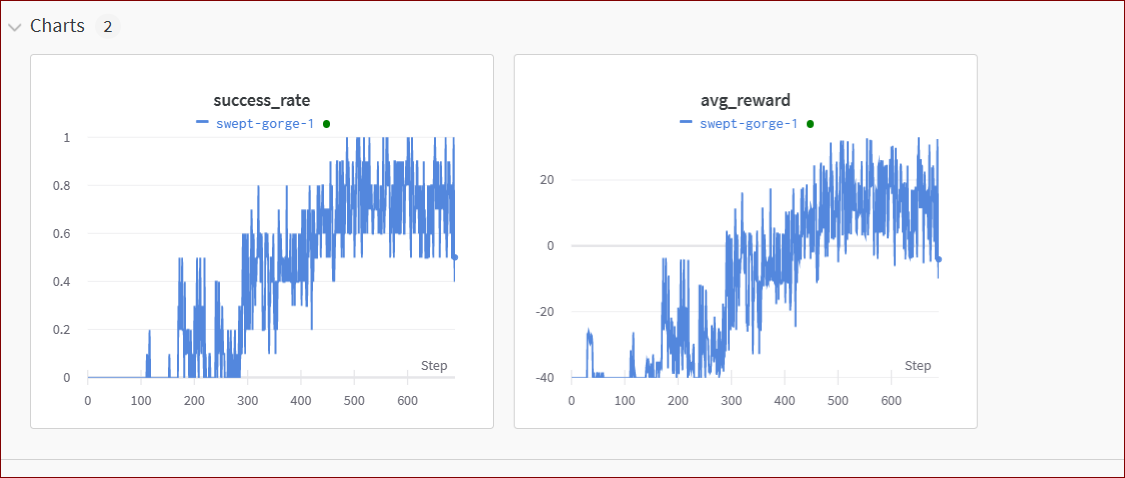

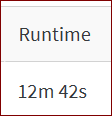
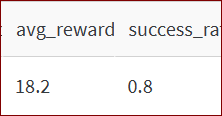
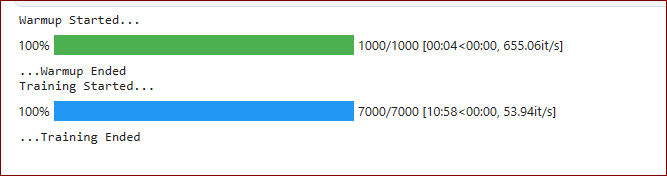

Результат тренировки на наборе данных с камерами

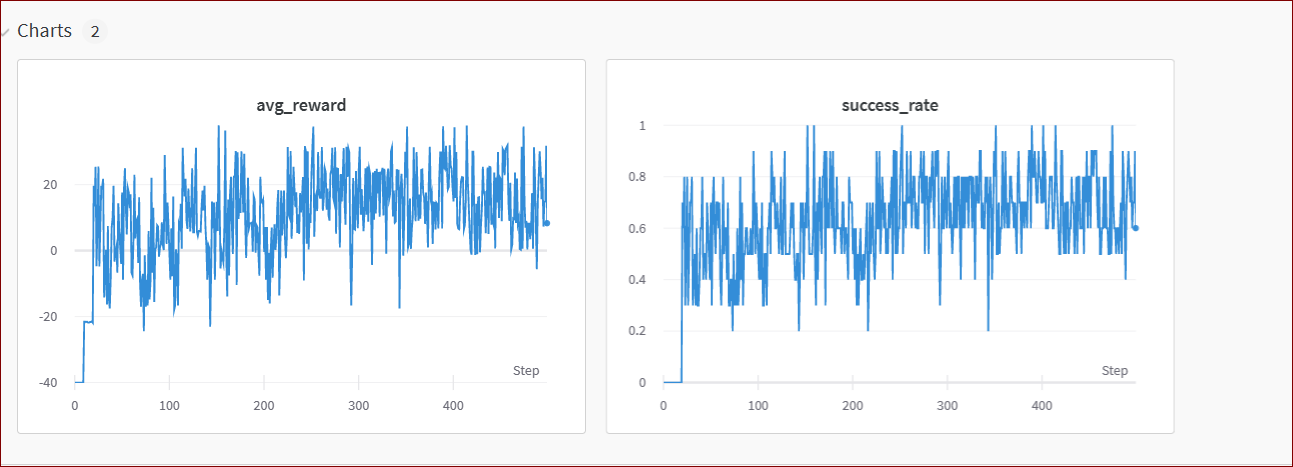
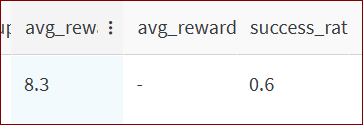
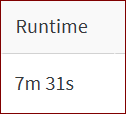
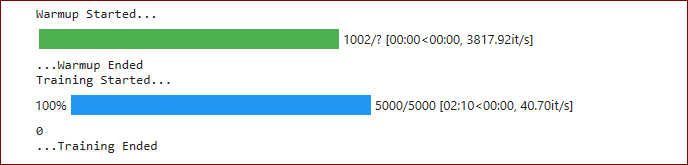


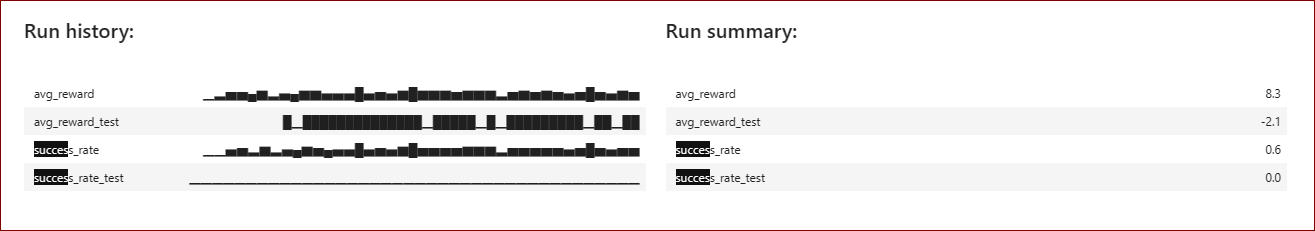

**Вот так выглядит диалог в начале обучения и в конце обучения:**

**Начало:**

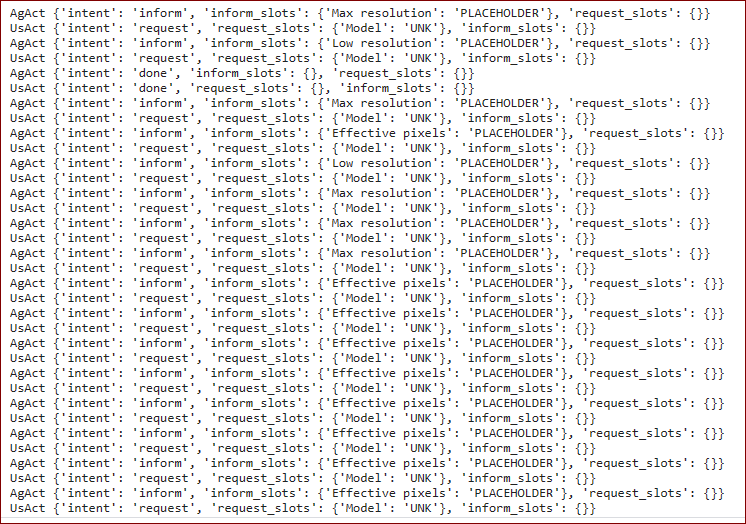

**Процесс:**

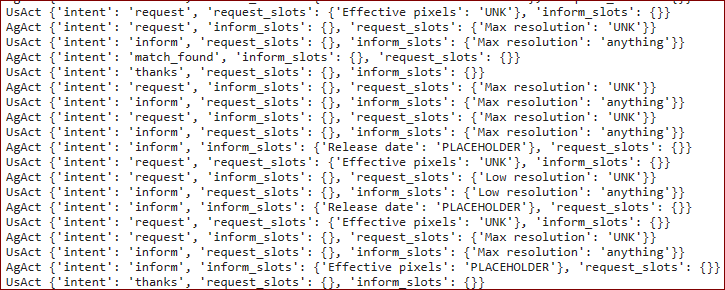

**Конец:**

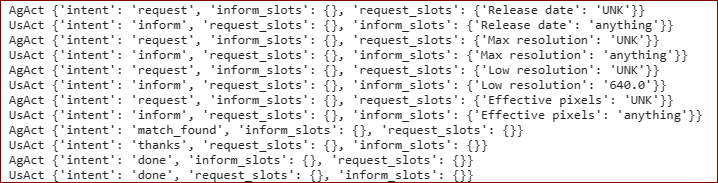
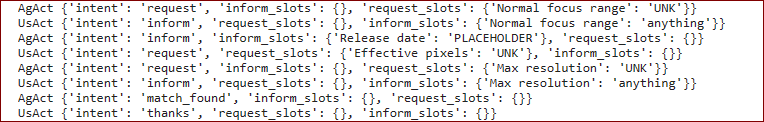

Метриками эффективности являются average_reward, которая складывается из суммарных наград за эпизод и succes_rate, которая складывается из суммарного успеха нескольких эпизодов и транслируется каждые десять эпизодов.

Цикл тестирования модели:\
Модель тестируется на тестировачном наборе данных, который генерируется аналогично тренировочному и использует веса тренировки.

In [ ]:


if __name__ == "__main__":

    parser = argparse.ArgumentParser()
    parser.add_argument('--constants_path', dest='constants_path', type=str, default='')
    args, unknown = parser.parse_known_args()
    params = vars(args)

    
    file_path_dict = constants['db_file_paths']
    DATABASE_FILE_PATH = file_path_dict['database']
    DICT_FILE_PATH = file_path_dict['dict']
    USER_GOALS_FILE_PATH = file_path_dict['user_goals']

    run_dict = constants['run']
    USE_USERSIM = run_dict['usersim']
    NUM_EP_TEST = run_dict['num_ep_run']
    MAX_ROUND_NUM = run_dict['max_round_num']


    database = pickle.load(open(DATABASE_FILE_PATH, 'rb'), encoding='latin1')

    remove_empty_slots(database)

    db_dict = pickle.load(open(DICT_FILE_PATH, 'rb'), encoding='latin1')

    user_goals = pickle.load(open(USER_GOALS_FILE_PATH, 'rb'), encoding='latin1')

    if USE_USERSIM:
        user = UserSimulator(user_goals, constants, database)
    else:
        user = User(constants)
    emc = ErrorModelController(db_dict, constants)
    state_tracker = StateTracker(database, constants)
    dqn_agent = DQNAgent(state_tracker.get_state_size(), constants)


def test_run():
   

    print('Testing Started...')
    episode = 0
    while episode < NUM_EP_TEST:
        episode_reset()
        episode += 1
        ep_reward = 0
        
        success_total=0
        
        done = False
        state = state_tracker.get_state()
        while not done:
       
            agent_action_index, agent_action = dqn_agent.get_action(state)
    
            state_tracker.update_state_agent(agent_action)
   
            user_action, reward, done, success = user.step(agent_action)
            ep_reward += reward
            success_total+=success
            
            if episode % 10 == 0:
                wandb.log({"success_rate_test": success_total / 10, 'avg_reward_test': ep_reward / 10})
                ep_reward = 0
            if not done:
                emc.infuse_error(user_action)
            state_tracker.update_state_user(user_action)
            state = state_tracker.get_state(done)
#         print('Episode: {} Success: {} Reward: {}'.format(episode, success, ep_reward))
#         print('Действие пользователя:{}'.format(user_action))
#         print('Действие агента:{}'.format(agent_action))
        
    print('...Testing Ended')


def episode_reset():

    state_tracker.reset()
    user_action = user.reset()
    emc.infuse_error(user_action)
    state_tracker.update_state_user(user_action)
    dqn_agent.reset()


test_run()


# 8. Альтернативные модели. Сравнение

В качестве альтернативных моделей были рассмотрены две модели с другим размером hidden_size

Рассмотрим метрики обучения модели с размерами hidden_size: 80, 30, 120 Для 5_000 эпизодов


**80:**

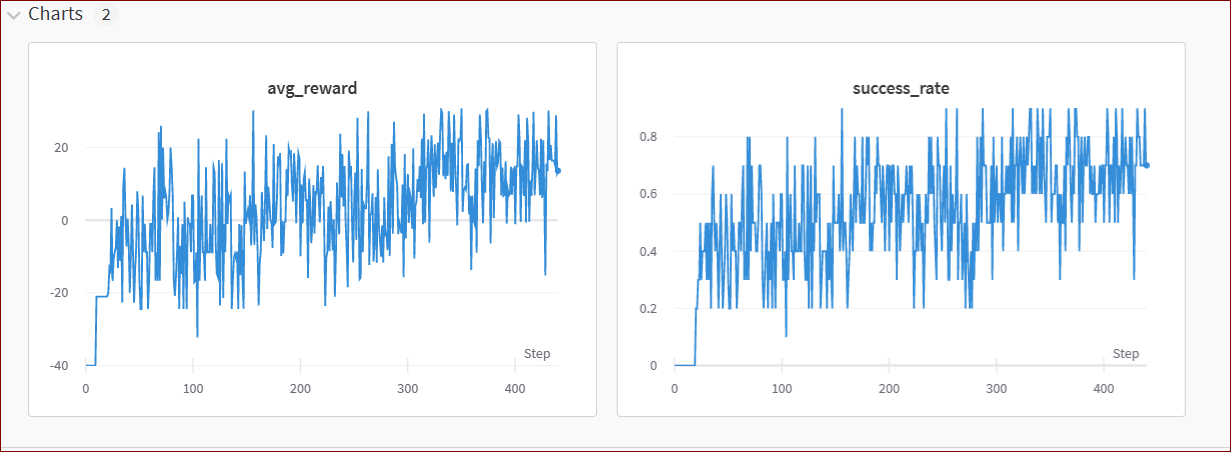

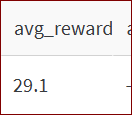
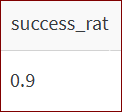
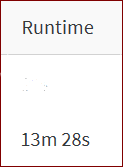

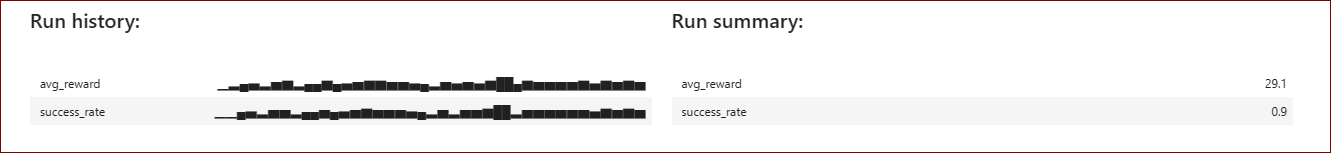

In [5]:
#тест

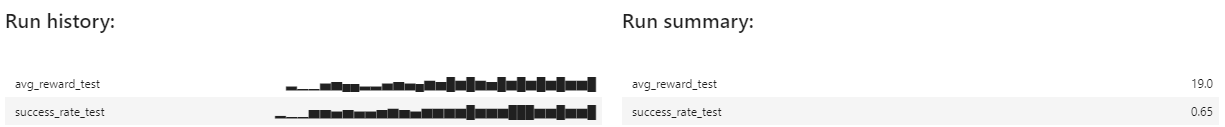

**30:**

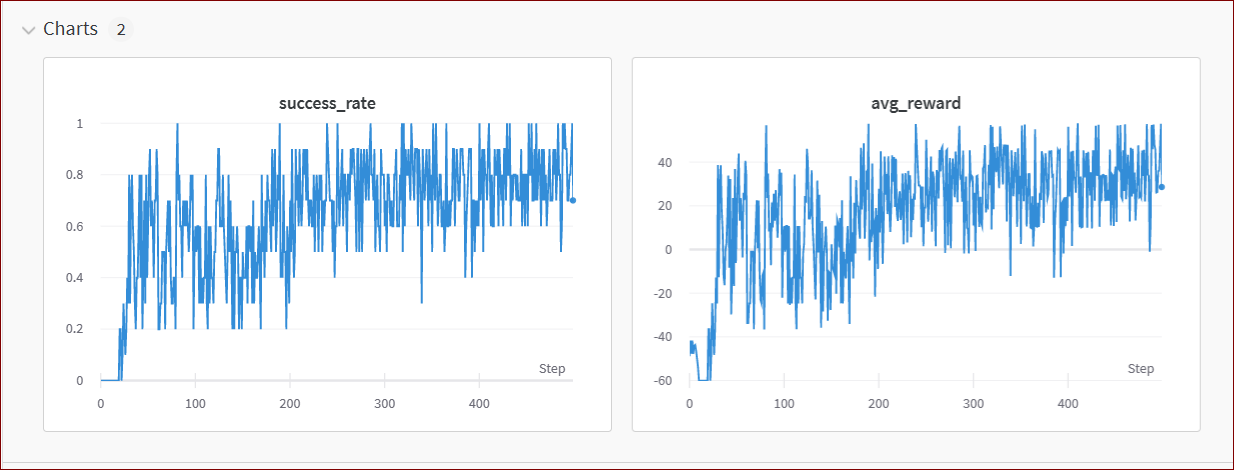

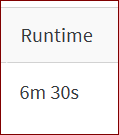
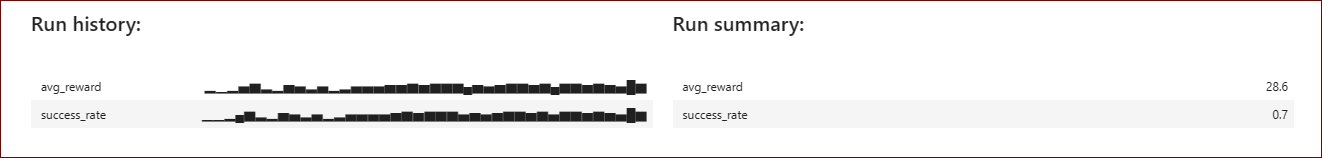

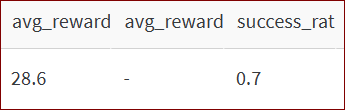

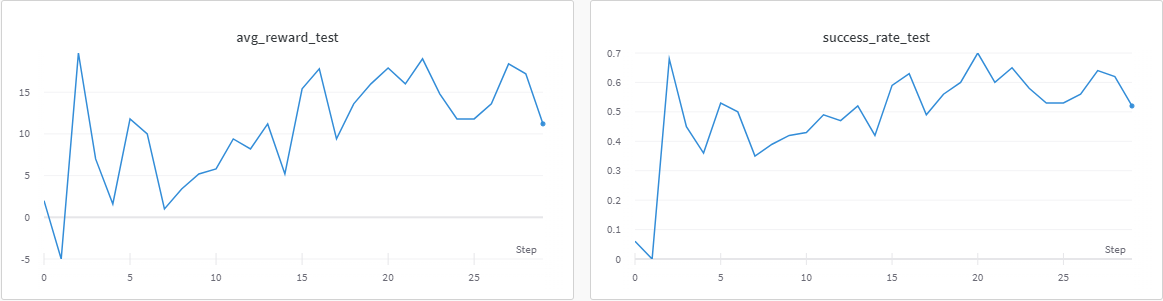

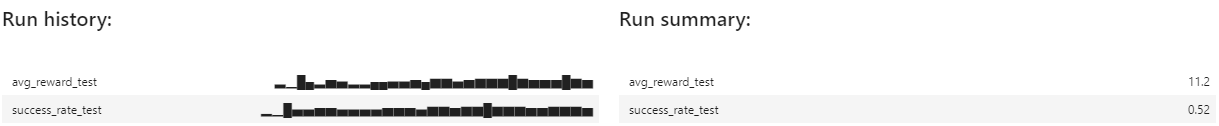

**120**

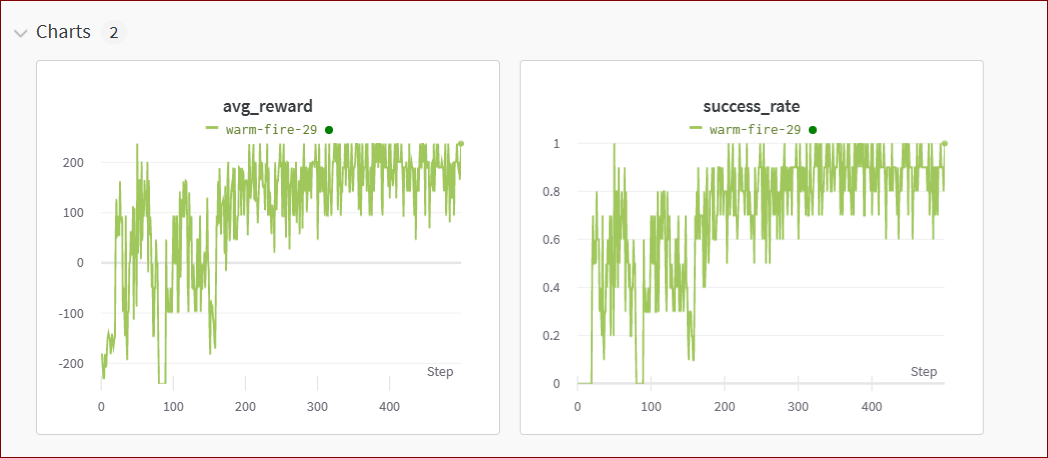

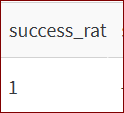
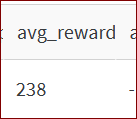
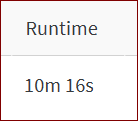

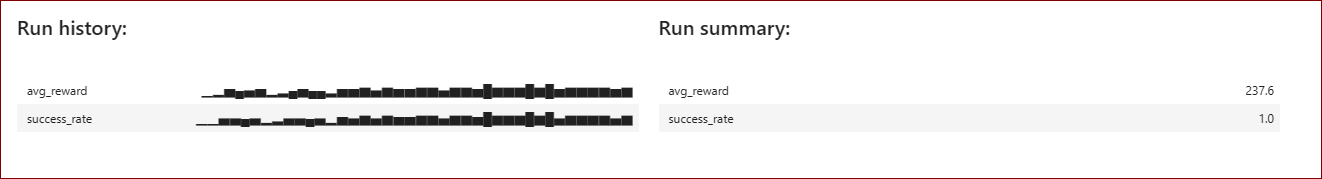

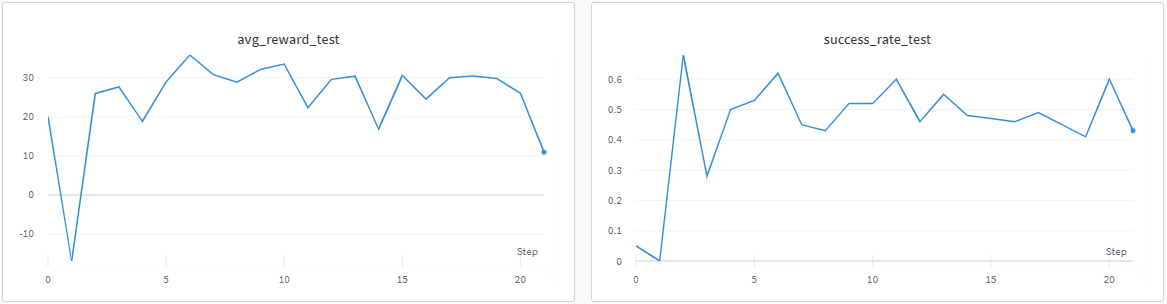

Основываясь на проведенном сравнении, можно сказать, что наилучшим вариантом (лучшие показатели, более успешный диалог) является модель с размером hidden_size=80.